In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("Heart_Disease_Prediction.csv")

df["Heart Disease"] = df["Heart Disease"].map({
    "Presence": 1,
    "Absence": 0
})


## Downloaded from Kaggle; 270 samples

### EDA

<class 'pandas.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage

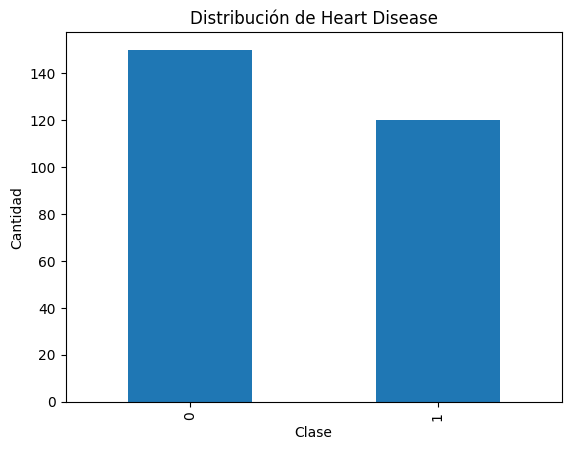

In [33]:
df.info()
df.describe()

# Valores faltantes
df.isnull().sum()

# Outliers (solo variables numéricas)
num_df = df.select_dtypes(include="number")

Q1 = num_df.quantile(0.25)
Q3 = num_df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((num_df < (Q1 - 1.5 * IQR)) | (num_df > (Q3 + 1.5 * IQR))).sum()
print(outliers)

# Distribución de la clase
df["Heart Disease"].value_counts()

df["Heart Disease"].value_counts().plot(kind="bar")
plt.title("Distribución de Heart Disease")
plt.xlabel("Clase")
plt.ylabel("Cantidad")
plt.show()

In [34]:
train_df = df.sample(frac=0.7, random_state=24)
test_df = df.drop(train_df.index)



# Step 2: Implement Basic Logistic Regression

## Sigmoid, cost (binary cross-entropy), GD (gradients, updates; track costs).

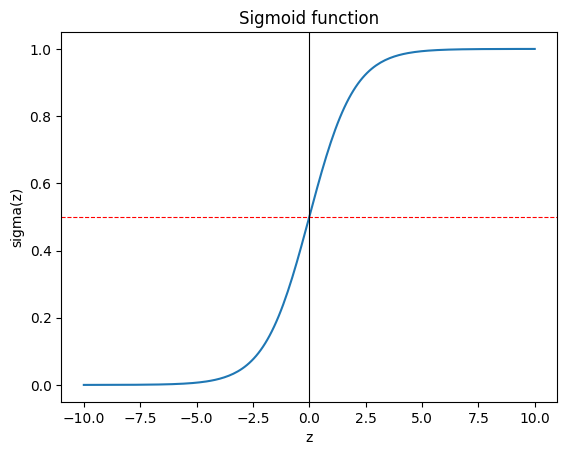

In [35]:
#Sigmoid

def sigmoid(z):
    """Compute the sigmoid of z."""
    return 1 / (1 + np.exp(-z))


# Visualize the sigmoid function
z_values = np.linspace(-10, 10, 200)
sig_values = sigmoid(z_values)

plt.figure()
plt.plot(z_values, sig_values)
plt.title("Sigmoid function")
plt.xlabel("z")
plt.ylabel("sigma(z)")
plt.ylim(-0.05, 1.05)
plt.axhline(0.5, color="red", linestyle="--", linewidth=0.8)
plt.axvline(0, color="black", linewidth=0.8)
plt.show()

## Train on full train set (α~0.01, 1000+ iters). Plot cost vs. iterations.

## Predict (threshold 0.5); evaluate acc/precision/recall/F1 on train/test.